<a href="https://colab.research.google.com/github/AlvaroBecker/CodingDojoTareas-/blob/main/SimulacionExamen2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [65]:
# Carga y manipulación de datos
import pandas as pd
import numpy as np

# Visualización de datos
import seaborn as sns
import matplotlib.pyplot as plt

# Creación de modelos
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 

# Transformadores y preprocesadores
from sklearn.preprocessing import StandardScaler
from sklearn.impute import KNNImputer

# Pipeline y conjuntos de datos
from sklearn.pipeline import Pipeline
from sklearn.model_selection import (train_test_split, 
                                    GridSearchCV)

# Métricas de evaluación
from sklearn.metrics import (classification_report, confusion_matrix,
 roc_curve, auc)
from sklearn.metrics import recall_score

In [66]:

url='/content/drive/MyDrive/Coding_dojo/Semana 7/Preparacion Examen/Fish - Fish.csv'
df=pd.read_csv(url)

La tarea es utilizar este conjunto de datos para predecir el peso de un pescado. El conjunto de datos original es de Kaggle.

Asegúrense de:

* Preparar/limpiar los datos para fines de análisis exploratorio
  * Para esta tarea, manejen los valores que faltan usando una estrategia de imputación adecuada (en lugar de eliminar filas).
  * Escriban una justificación de sus estrategias para imputar los valores faltantes.
  * Eviten cualquier fuga de datos cuando imputen los valores.
  * Garanticen que los tipos de datos encajen con los que están listados en el diccionario de datos (si tuvieran).
  * Comprueben si hay valores incoherentes en las columnas categóricas y soluciónelos.
  * Comprueben si hay valores imposibles en las columnas numéricas.
* Explorar los datos 
  * Creen al menos dos tipos diferentes de visualizaciones exploratorias
  * Escriban una o dos oraciones sobre qué les dicen cada visualización sobre los datos.
* Preparar los datos adecuadamente para modelar 
  * Implementen un pipeline de preprocesamiento para evitar una fuga de datos.
  * Escalen los datos si el modelo lo requiere.
  * Escriban una justificación sobre cómo codifican las variables (codificación original vs. codificación one-hot)
* Crear y comparar al menos 2 diferentes modelos
  * Pongan sus preprocesamientos y modelos en pipeline.
  * Para cada tipo de modelo, creen una versión por defecto para cada modelo con hiperparámetros por defecto.
  * Creen versiones adicionales de cada tipo de modelo donde afinen los hiperparámetros para cada modelo.
  * Utilicen métricas adecuadas para evaluar cada modelo.
* Escoger un modelo final.
  * Escriban una justificación de sus opciones del modelo final.
* Incluir un código claro, comentado y organizado. Tengan en cuenta que se restarán puntos por la inclusión de:
  * un código inadecuado o redundante
  * importaciones inadecuadas o sin uso para la modelización o las métricas de evaluación
  * errores restantes en el código
  * archivos inadecuados o innecesarios

#Analisis exploratorio

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  150 non-null    float64
 5   Height   156 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [68]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [69]:
df.isna().sum()

Species    4
Weight     0
Length1    2
Length2    2
Length3    9
Height     3
Width      2
dtype: int64

In [70]:
df.duplicated().sum()

0

In [71]:
df['Species'].unique()

array(['Bream', 'Beam', 'Roach', nan, 'Whitefish', 'Parkki', 'Perch',
       'Pike', 'Smelt'], dtype=object)

In [95]:
df.groupby('Species')['Species'].count()

Species
Bream        35
Parkki       12
Perch        54
Pike         17
Roach        19
Smelt        14
Whitefish     8
Name: Species, dtype: int64

In [72]:
df.loc[df['Species'] == 'Beam', 'Species'] = 'Bream'

In [73]:
especies =df['Species'].unique()

In [74]:
especies = np.concatenate((especies[:2], especies[3:]))

In [75]:
species_num = {species: index for index, species in enumerate(especies)}
species_dict={index: specie for specie,index in species_num.items()}


In [76]:
df_especies_num=df.copy()
df_especies_num['Species']=df_especies_num['Species'].map(species_num)

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  155 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  157 non-null    float64
 3   Length2  157 non-null    float64
 4   Length3  150 non-null    float64
 5   Height   156 non-null    float64
 6   Width    157 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [78]:
df_especies_num.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,0.0,242.0,23.2,25.4,30.0,11.5200,4.0200
1,0.0,290.0,24.0,26.3,31.2,12.4800,4.3056
2,0.0,340.0,23.9,26.5,31.1,12.3778,4.6961
3,0.0,363.0,26.3,29.0,33.5,12.7300,4.4555
4,0.0,430.0,26.5,29.0,34.0,12.4440,5.1340


In [79]:
rows_na=df[df.isnull().any(True)]

<ipython-input-79-213650cf10b9>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  rows_na=df[df.isnull().any(True)]


In [80]:
for i in list(df.columns[1:]):
  df[i].fillna(df.groupby(['Species'])[i].transform('mean'), inplace=True)

In [81]:
df.loc[df['Species'].isna()]

,Species,Weight,Length1,Length2,Length3,Height,Width
46,NaN,140.0,21.0,22.5,25.0,6.5500,3.3250
77,NaN,100.0,16.2,18.0,19.2,5.2224,3.3216
88,NaN,130.0,20.0,22.0,23.5,6.1100,3.5250
117,NaN,650.0,36.5,39.0,41.4,11.1366,6.0030


In [82]:
df_especies_num.loc[df_especies_num['Species'].isna()]

,Species,Weight,Length1,Length2,Length3,Height,Width
46,NaN,140.0,21.0,22.5,25.0,6.5500,3.3250
77,NaN,100.0,16.2,18.0,19.2,5.2224,3.3216
88,NaN,130.0,20.0,22.0,23.5,6.1100,3.5250
117,NaN,650.0,36.5,39.0,41.4,11.1366,6.0030


In [83]:
df_especies_num.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [84]:
from sklearn.impute import KNNImputer
# Create a KNN imputer object with k=3
imputer = KNNImputer(n_neighbors=3)

# Impute missing values in the 'Species' column
df_especies_num['Species'] = imputer.fit_transform(df_especies_num[['Width', 'Height', 'Species']])[:, 2]
df_especies_num['Species'] =np.round(df_especies_num['Species'] )

In [85]:
df['Species']=df_especies_num['Species'].map(species_dict)

In [86]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [87]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.291740,28.381971,31.210180,8.972248,4.418518
std,357.978317,10.053533,10.514213,11.016522,4.271112,1.687292
min,0.000000,7.500000,8.400000,10.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.500000,6.031600,3.385650
50%,273.000000,25.200000,27.300000,30.070833,7.786000,4.248500
75%,650.000000,32.700000,36.000000,39.550000,12.365900,5.584500
max,1650.000000,59.000000,60.000000,64.000000,18.957000,8.142000


In [88]:
df.loc[df['Weight']<1, 'Weight']=df.loc[df['Species']=='Roach','Weight'].mean()

Graficos de exploracion

<ipython-input-89-a052da3be8f4>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


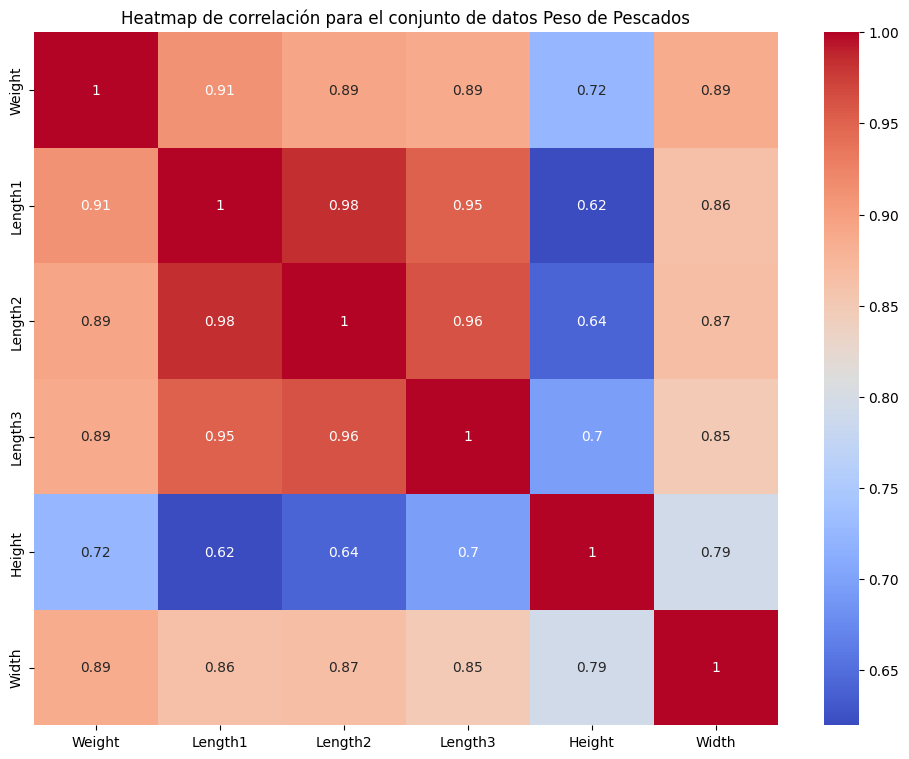

In [89]:
corr_matrix = df.corr()
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Heatmap de correlación para el conjunto de datos Peso de Pescados")
plt.show()

A partir de este mapa de calor, podemos observar que todas las columnas tienen una alta correlación. Sin embargo, hay que tener en cuenta que el conjunto de datos es muy pequeño (158 filas x 7 columnas)

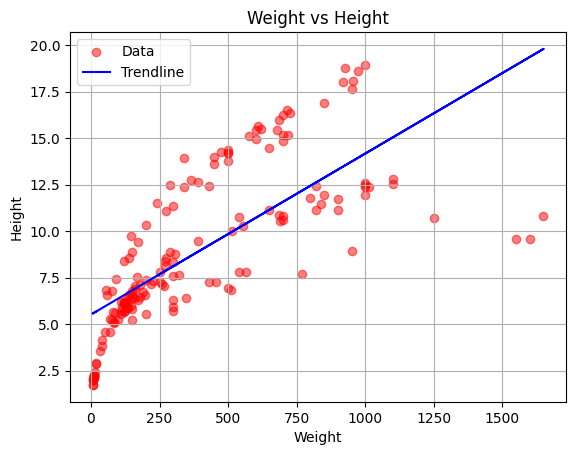

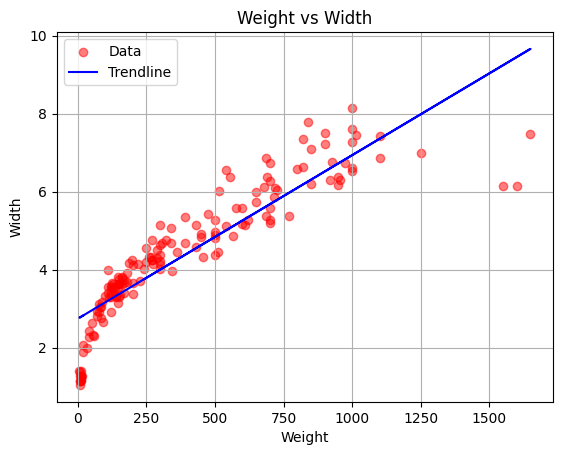

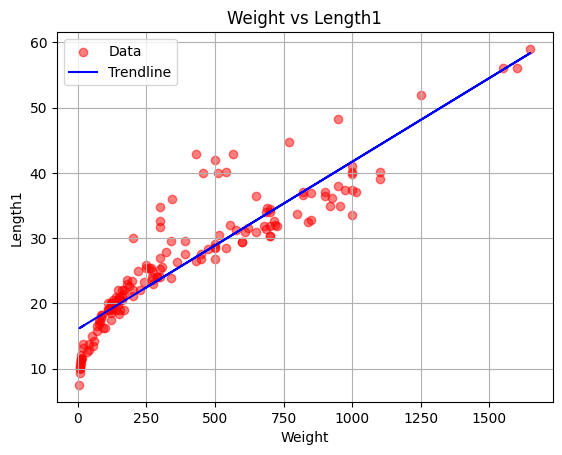

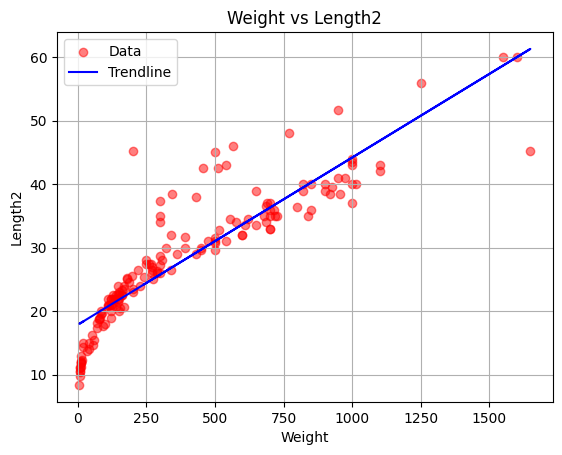

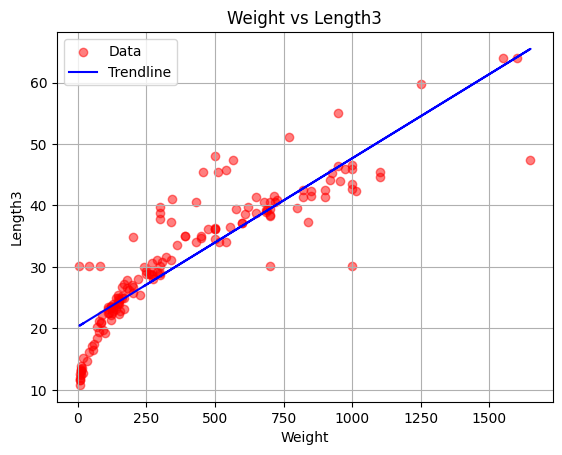

In [90]:
# Calcular la regresión lineal
x = np.array(df['Weight'])
y = np.array(df['Height'])
m, b = np.polyfit(x, y, 1)

# Crear un gráfico de dispersión para comparar Weight y Height
plt.figure()
plt.scatter(x, y, c='red', alpha=0.5, label='Data')
plt.plot(x, m * x + b, c='blue', label='Trendline')
plt.title('Weight vs Height')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.grid(True)
plt.legend()
plt.figure()
y = np.array(df['Width'])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, c='red', alpha=0.5, label='Data')
plt.plot(x, m * x + b, c='blue', label='Trendline')
plt.title('Weight vs Width')
plt.xlabel('Weight')
plt.ylabel('Width')
plt.grid(True)
plt.legend()
plt.figure()
y = np.array(df['Length1'])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, c='red', alpha=0.5, label='Data')
plt.plot(x, m * x + b, c='blue', label='Trendline')
plt.title('Weight vs Length1')
plt.xlabel('Weight')
plt.ylabel('Length1')
plt.grid(True)
plt.legend()
plt.figure()
y = np.array(df['Length2'])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, c='red', alpha=0.5, label='Data')
plt.plot(x, m * x + b, c='blue', label='Trendline')
plt.title('Weight vs Length2')
plt.xlabel('Weight')
plt.ylabel('Length2')
plt.grid(True)
plt.legend()
plt.figure()
y = np.array(df['Length3'])
m, b = np.polyfit(x, y, 1)
plt.scatter(x, y, c='red', alpha=0.5, label='Data')
plt.plot(x, m * x + b, c='blue', label='Trendline')
plt.title('Weight vs Length3')
plt.xlabel('Weight')
plt.ylabel('Length3')
plt.grid(True)
plt.legend()
plt.show()

Estos gráfico de dispersión muestran una relación directa entre el tamaño del pez y su peso. Esto sugiere que, en general, los peces más grandes tienden a pesar más que los peces más pequeños.

* Preparar los datos adecuadamente para modelar 
  * Implementen un pipeline de preprocesamiento para evitar una fuga de datos.
  * Escalen los datos si el modelo lo requiere.
  * Escriban una justificación sobre cómo codifican las variables (codificación original vs. codificación one-hot)

* Crear y comparar al menos 2 diferentes modelos
  * Pongan sus preprocesamientos y modelos en pipeline.
  * Para cada tipo de modelo, creen una versión por defecto para cada modelo con hiperparámetros por defecto.
  * Creen versiones adicionales de cada tipo de modelo donde afinen los hiperparámetros para cada modelo.
  * Utilicen métricas adecuadas para evaluar cada modelo.

In [91]:
 y=df['Species']
 X=df.drop(columns='Species')

In [92]:
X_train,X_test,y_train, y_test= train_test_split(X,y, random_state=50)


In [93]:
def train_eval_print(models, X_train, y_train, X_test, y_test):
    # Inicializar la variable que almacenará la mejor puntuación encontrada
    best_score = 0
    
    # Iterar sobre cada modelo y sus parámetros en la lista de modelos proporcionada
    for name, model, params in models:
        # Crear un pipeline que primero escala los datos y luego entrena el modelo
        pipe = Pipeline([('scaler', StandardScaler()), 
                         (name.lower(), model)])       
        
        # Crear un objeto GridSearchCV para encontrar los mejores parámetros para el modelo actual
        grid = GridSearchCV(pipe, params, cv=5, n_jobs=-1, scoring='accuracy')
        
        # Ajustar el GridSearchCV a los datos de entrenamiento
        grid.fit(X_train, y_train)
        
        # Calcular la puntuación del modelo en el conjunto de prueba
        score = grid.score(X_test, y_test)

        # Calcular la puntuación del modelo en el conjunto de entrenamiento
        score_train = grid.score(X_train, y_train)
        y_train_pred = grid.predict(X_train)
        y_train_pred = grid.predict(X_train)
        score_recall = recall_score(y_train, y_train_pred, average='weighted')  # Puedes cambiar 'weighted' por 'macro', 'micro' o None, según tus necesidades
        score_recall_test = recall_score(y_train, y_train_pred, average='weighted')
        print(f"{name} Recall score train: {score_recall}")
        print(f"{name} Recall score test: {score_recall_test}")
        # Imprimir las puntuaciones de prueba y entrenamiento para el modelo actual
        print(f'{name}: accuracy score train {score_train}')
        print(f'{name}: accuracy score test {score}')
        
        
        
        # Comprobar si la puntuación de prueba del modelo actual es mejor que la mejor puntuación encontrada hasta ahora
        if score > best_score:
            best_score = score
            best_model = grid.best_estimator_
    
    # Devolver el mejor modelo encontrado
    return best_model

In [94]:
# Esta lista define los modelos y sus respectivos parámetros que se probarán mediante GridSearchCV en la función train_eval_print
models = [
    ('RF', RandomForestClassifier(), {'rf__n_estimators': [100, 200, 300], 'rf__max_depth': [5, 10, 15,20,25]}),
    ('LR', LogisticRegression(), {'lr__C': [0.1, 1, 10, 100]}),
    ('DT', DecisionTreeClassifier(), {'dt__max_depth': [5, 10, 15,20,25]})
]

# Entrenamiento de modelos y ejecución de pipeline a través de la función previamente creada
best_model = train_eval_print(models, X_train, y_train, X_test, y_test)

RF Recall score train: 0.907563025210084
RF Recall score test: 0.907563025210084
RF: accuracy score train 0.907563025210084
RF: accuracy score test 0.625
LR Recall score train: 0.9411764705882353
LR Recall score test: 0.9411764705882353
LR: accuracy score train 0.9411764705882353
LR: accuracy score test 0.85
DT Recall score train: 0.9915966386554622
DT Recall score test: 0.9915966386554622
DT: accuracy score train 0.9915966386554622
DT: accuracy score test 0.6


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Debido a que el dataset es muy disperso se, elegira como mejor metrica a evaluar el Recall score dando como mejor resultado el modelo de DesicionTreeClassifier debido a que sus puntuaciones en train y test son muy cercanas entre si.